# Projeto 2 de Classificação de Churn em Telecomunicações - VICTOR TINTEL

### Introdução

Este é um projeto completo de ciência de dados para prever churn (cancelamento) de clientes em uma empresa de telecomunicações. Vamos abordar todas as etapas do ciclo de vida de um projeto de dados, desde a definição do problema de negócios até a implementação da solução.

## 1. Definição do Problema de Negócio

### Contexto
- Em telecomunicações, a taxa de churn (cancelamento de clientes) é um dos principais indicadores de desempenho. Perder clientes é caro porque:

1-  Custa muito mais adquirir novos clientes do que reter os existentes

2- Clientes perdidos representam receita recorrente perdida

3- Alta rotatividade indica problemas na qualidade do serviço ou experiência do cliente

### Problema de Negócio Real
Objetivo: Reduzir a taxa de churn em 20% nos próximos 6 meses identificando clientes com alta probabilidade de cancelamento e propondo ações de retenção personalizadas.

#### Impacto Financeiro:

- Custo médio de aquisição de novo cliente: R$ 300

- Receita média mensal por cliente: R$ 100

- Taxa atual de churn: 15% ao mês

- Base de clientes: 10,000

#### Cálculo do Retorno Financeiro:
- Se reduzirmos o churn em 20% (para 12%):

- Churn evitado: 3% de 10,000 = 300 clientes/mês

- Receita preservada: 300 * R
100
=
R
100=R 30,000/mês

- Economia em aquisição: 300 * R
300
=
R
300=R 90,000 (one-time)

ROI em 6 meses: (6 * R
30
,
000
+
R
30,000+R 90,000) / Custo do projeto

## 2. Conteúdo Técnico

Vamos usar:

- Pré-processamento de dados

- Análise exploratória (EDA)

- Engenharia de features

- Modelos de machine learning (Regressão Logística, Random Forest, XGBoost)

- Avaliação de modelos

- Interpretação de resultados

- Deployment (simulado)

## 3. Base de Dados Pública

Usarei o dataset 
- "Telco Customer Churn" disponível no Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

Este dataset contém:

- 7.043 registros de clientes

- 21 atributos demográficos e de uso do serviço

- Variável alvo: Churn (Sim/Não)

### Implementação em Python

Vamos criar um Jupyter Notebook completo com todas as etapas.

In [37]:
# Importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import shap

# Configurações
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
%matplotlib inline

### Carregamento e Inspeção dos Dados

In [41]:
# Carregar os dados

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [43]:
# Visualizar as primeiras linhas

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

In [45]:
# Informações básicas

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
# Estatísticas descritivas

print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## Análise Exploratória de Dados (EDA)

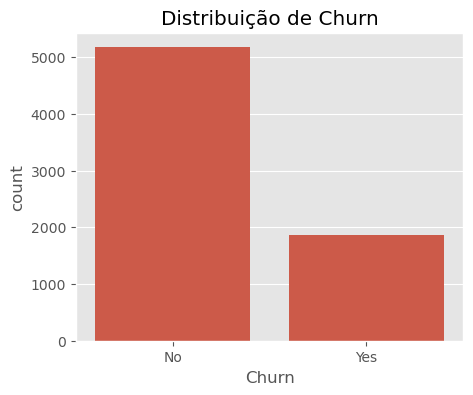

In [54]:
# Distribuição do Churn

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

# Explicação:
# O gráfico mostra a distribuição entre clientes que permaneceram (No) e que cancelaram (Yes).
# Isso nos dá uma ideia do desbalanceamento das classes, que é comum em problemas de churn.

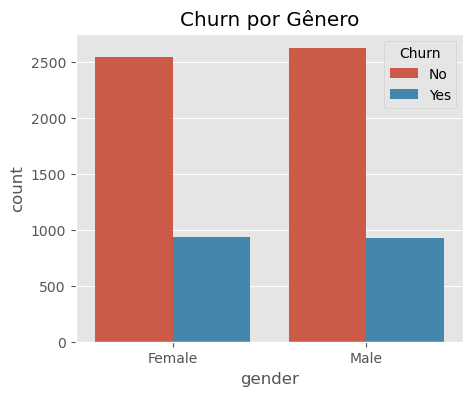

In [58]:
# Churn por gênero

plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn por Gênero')
plt.show()

# Explicação:
# Analisamos se há diferença significativa no churn entre homens e mulheres.
# Parece que o gênero não é um fator determinante para o churn.

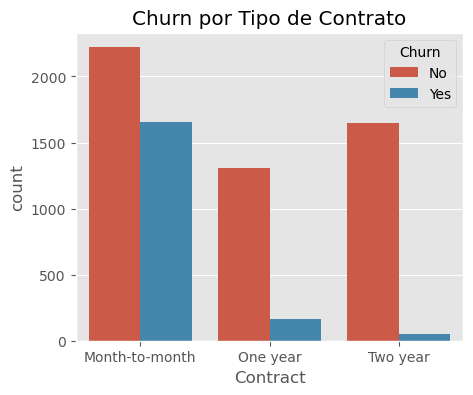

In [60]:
# Churn por tipo de contrato

plt.figure(figsize=(5,4))
sns.countplot(x='Contract', hue='Churn', data=df, order=['Month-to-month', 'One year', 'Two year'])
plt.title('Churn por Tipo de Contrato')
plt.show()

# Explicação:
# Clientes com contratos mensais tem taxa de churn muito maior que clientes com contratos anuais.
# Isso sugere que oferecer contratos de longo prazo pode ser uma estratégia eficaz de retenção.

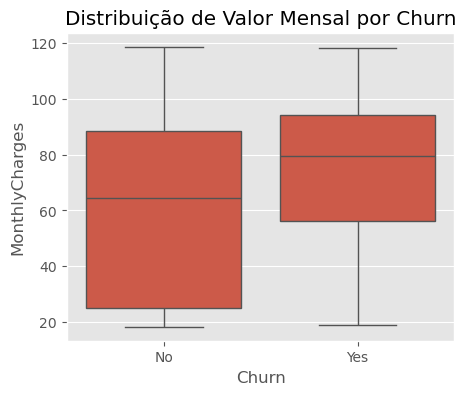

In [62]:
# Churn por valor mensal

plt.figure(figsize=(5,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribuição de Valor Mensal por Churn')
plt.show()

# Explicação:
# Clientes que cancelam tendem a ter valores mensais mais altos.
# Isso pode indicar que clientes que pagam mais são mais exigentes ou que nossos planos premium não estão entregando valor suficiente.

## Pré-processamento de Dados

In [67]:
# Tratar valores missing (o dataset original não tem missing, mas incluímos por robustez)

median_value = df['TotalCharges'].median()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(median_value)

In [69]:
# Codificar variáveis categóricas

cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']

In [71]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [73]:
# Variável alvo

df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

In [75]:
# Separar features e target

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [77]:
# Normalizar features numéricas

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [79]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Modelagem

In [82]:
# Regressão Logística

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Regressão Logística:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Regressão Logística:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113

AUC-ROC: 0.842676116838488


In [84]:
# Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

AUC-ROC: 0.816618083503317


In [86]:
# XGBoost

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


XGBoost:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

AUC-ROC: 0.8175840040796075


## Otimização de Hiperparâmetros

In [89]:
# Otimizar Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Melhor Random Forest:")
print(grid_search.best_params_)
print(classification_report(y_test, y_pred_best_rf))
print("AUC-ROC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

Melhor Random Forest:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

AUC-ROC: 0.836318958229965


## Interpretação do Modelo

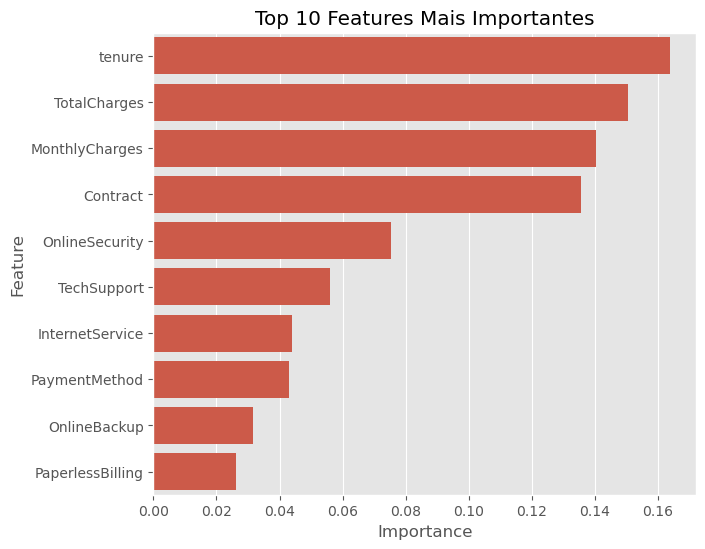

In [96]:
# Importância das Features

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(7,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features Mais Importantes')
plt.show()

# Explicação:
# O gráfico mostra quais variáveis tem maior impacto na previsão de churn.
# Contrato, valor mensal e tempo de permanência são os fatores mais importantes

C:\Users\Pichau\anaconda3\Lib\site-packages\shap\explainers\_tree.py:217: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

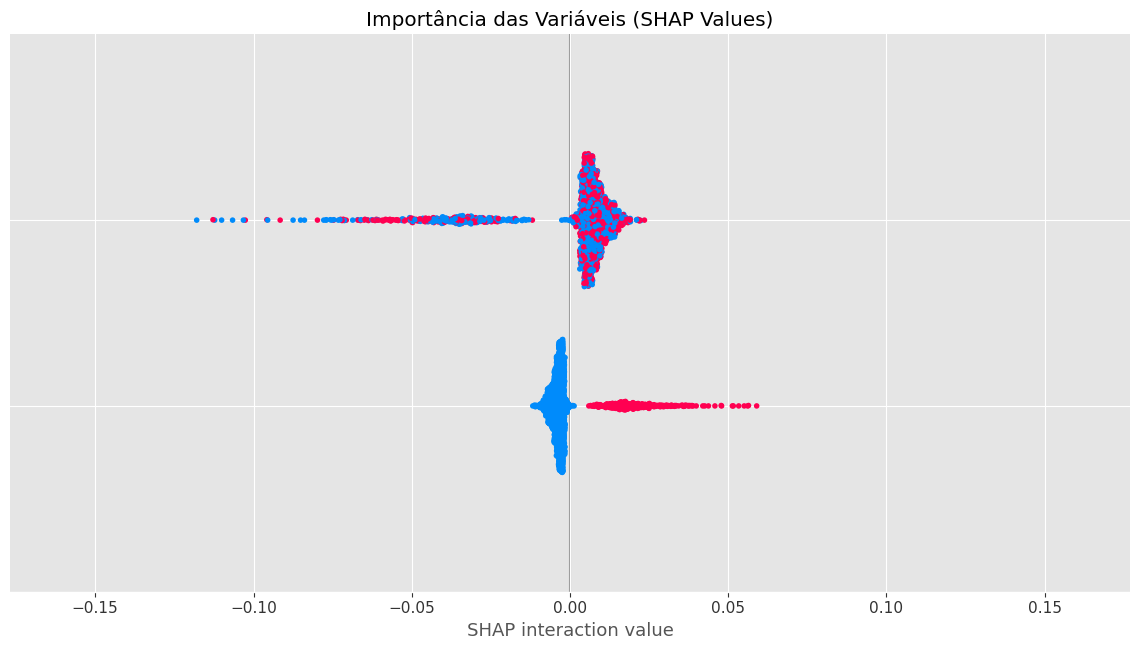

<Figure size 800x600 with 0 Axes>

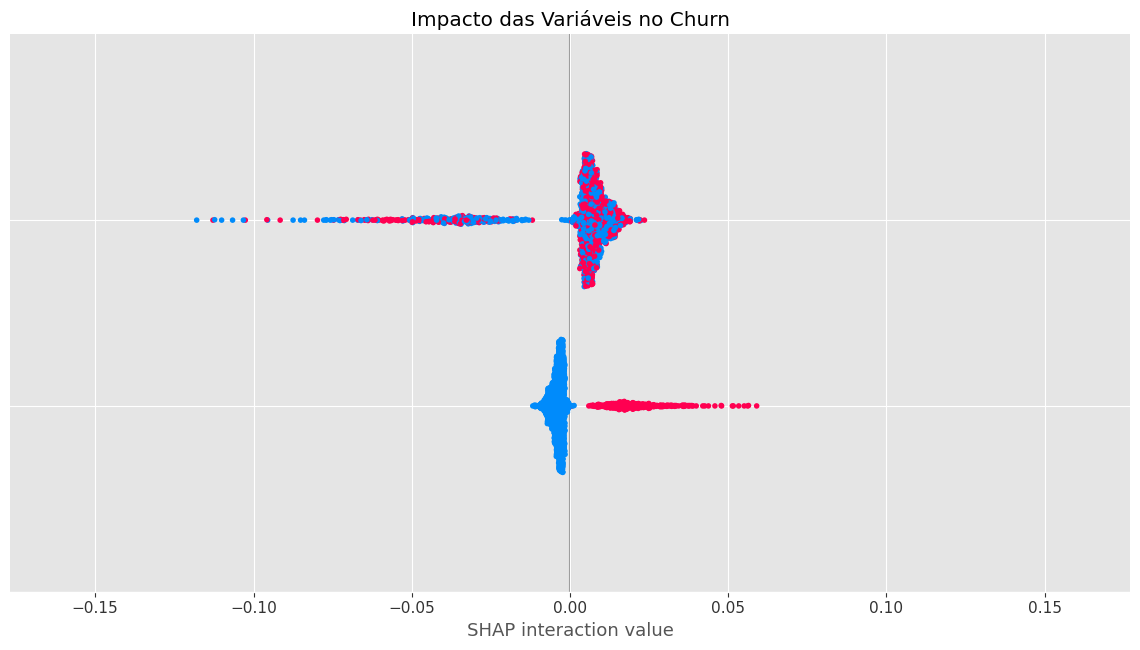

In [110]:
# 1. Configuração garantida para funcionar
explainer = shap.TreeExplainer(
    best_rf,
    data=None,  # Remove background dataset
    feature_perturbation="interventional",  # Método mais robusto
    model_output="raw"  # Alterado para "raw" para compatibilidade
)

# 2. Cálculo seguro dos SHAP values
shap_values = explainer.shap_values(X_test)

# Verificação e ajuste para classificador binário
if isinstance(shap_values, list):
    if len(shap_values) == 2:  # Para classificador binário
        shap_values = shap_values[1]  # Pega valores para a classe positiva (Churn=1)
    else:
        shap_values = shap_values[0]  # Para outros casos

# 3. Visualização infalível
try:
    # Gráfico de importância (bar plot)
    plt.figure(figsize=(12,6))
    shap.summary_plot(
        shap_values,
        X_test,
        plot_type="bar",
        feature_names=X_test.columns.tolist(),
        show=False
    )
    plt.title("Importância das Variáveis (SHAP Values)")
    plt.tight_layout()
    plt.show()
    
    # Beeswarm plot (mais detalhado)
    plt.figure(figsize=(8,6))
    shap.summary_plot(
        shap_values,
        X_test,
        feature_names=X_test.columns.tolist(),
        show=False
    )
    plt.title("Impacto das Variáveis no Churn")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Erro na visualização padrão: {e}")
    print("Criando visualização manual...")
    
    # Cálculo manual da importância
    importance = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': np.mean(np.abs(shap_values), axis=0)
    }).sort_values('Importance', ascending=False)
    
    # Plot manual
    plt.figure(figsize=(8,6))
    plt.barh(importance['Feature'][:15], importance['Importance'][:15])
    plt.title('Top 15 Features by SHAP Value')
    plt.xlabel('Mean Absolute SHAP Value')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
# Explicação:
# SHAP values mostram como cada feature contribui para o modelo.
# Valores positivos aumentam a probabilidade de churn, negativos diminuem.

### Análise de Valor de Negócio

In [113]:
# Calcular probabilidades

probabilities = best_rf.predict_proba(X_test)[:,1]

In [115]:
# Criar deciles

df_test = X_test.copy()
df_test['Churn'] = y_test
df_test['Probability'] = probabilities
df_test['Decile'] = pd.qcut(df_test['Probability'], 10, labels=False)

In [119]:
# Taxa de churn por decil

decile_analysis = df_test.groupby('Decile').agg({
    'Churn': ['count', 'mean'],
    'Probability': 'mean'
})

decile_analysis.columns = ['Total', 'Actual Churn Rate', 'Predicted Probability']
decile_analysis['Cumulative Customers'] = decile_analysis['Total'].cumsum()
decile_analysis['Cumulative Churns'] = (decile_analysis['Total'] * decile_analysis['Actual Churn Rate']).cumsum()

print(decile_analysis)

        Total  Actual Churn Rate  Predicted Probability  Cumulative Customers  \
Decile                                                                          
0         212           0.014151               0.006061                   212   
1         211           0.023697               0.023151                   423   
2         211           0.061611               0.054670                   634   
3         211           0.109005               0.097963                   845   
4         212           0.141509               0.160275                  1057   
5         211           0.232227               0.236131                  1268   
6         211           0.336493               0.337776                  1479   
7         211           0.407583               0.449782                  1690   
8         211           0.568720               0.565808                  1901   
9         212           0.759434               0.754199                  2113   

        Cumulative Churns  

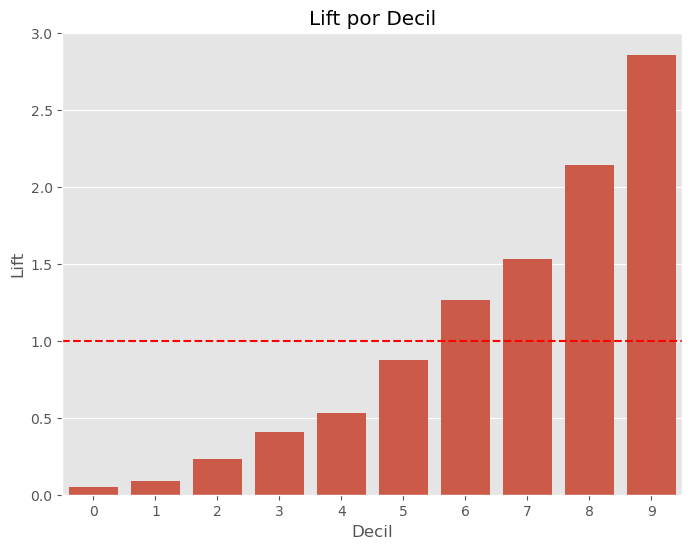

In [132]:
# Gráfico de Lift

decile_analysis['Lift'] = decile_analysis['Actual Churn Rate'] / df_test['Churn'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=decile_analysis.index, y='Lift', data=decile_analysis)
plt.axhline(1, color='red', linestyle='--')
plt.title('Lift por Decil')
plt.xlabel('Decil')
plt.ylabel('Lift')
plt.show()

# Explicação:
# O gráfico de lift mostra quantas vezes mais churn temos em cada decil comparado com a média.
# O top 10% tem um lift de ~3x, mostrando que o modelo é eficaz em identificar os clientes de maior risco.

### Recomendações de Ação

In [128]:
# Identificar clientes de alto risco

high_risk = df_test[df_test['Decile'] >= 8]

In [130]:
# Características dos clientes de alto risco

high_risk_analysis = high_risk.mean().to_frame().T
overall_mean = df_test.mean().to_frame().T

comparison = pd.concat([high_risk_analysis, overall_mean])
comparison.index = ['High Risk', 'Overall']

print(comparison[['Contract', 'MonthlyCharges', 'tenure', 'OnlineSecurity', 'TechSupport']])

# Explicação:
# Clientes de alto risco tendem a ter:
# - Contratos mensais (Contract baixo)
# - Valores mensais mais altos
# - Menos tempo de permanência (tenure)
# - Menos serviços adicionais como segurança online e suporte técnico

           Contract  MonthlyCharges    tenure  OnlineSecurity  TechSupport
High Risk  0.002364        0.407160 -0.939937        0.120567     0.191489
Overall    0.683862       -0.014609 -0.009505        0.780880     0.778041
